In [1]:
from train import learn_model
from agent_distribution import AgentDistribution
from utils import compute_continuity_noise, compute_contraction_noise, fixed_point_interpolation_true_distribution
from expected_gradient import ExpectedGradient
from reparametrized_gradient import plot_total_derivative

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_challenging_agent_dist(n, n_types, d):
    gaming_type_etas = np.random.uniform(3., 5., int(n_types * d/2)).reshape(int(n_types/2), d, 1)
    gaming_type_gamma_one = np.random.uniform(0.01, 0.02, int(n_types/2) ).reshape(int(n_types/2), 1, 1)
    gaming_type_gamma_two = np.random.uniform(10., 20., int(n_types/2)).reshape(int(n_types/2), 1, 1)
    gaming_type_gammas = np.hstack((gaming_type_gamma_one, gaming_type_gamma_two))
    
    natural_type_etas = np.random.uniform(5., 7., int(n_types *d/2)).reshape(int(n_types/2), d, 1)
    natural_type_gammas = np.random.uniform(10., 20., int(n_types * d/2)).reshape(int(n_types/2), d, 1)
    
    etas = np.vstack((gaming_type_etas, natural_type_etas))
    gammas = np.vstack((gaming_type_gammas, natural_type_gammas))
    dic = {"etas": etas, "gammas": gammas}
    agent_dist = AgentDistribution(n=n, d=d, n_types=n_types, types=dic, prop=None)
    return agent_dist

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.79it/s]


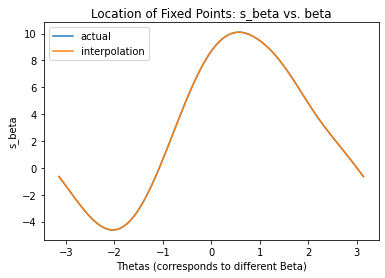

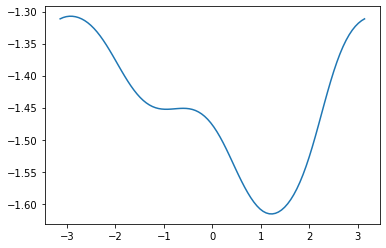

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.71it/s]


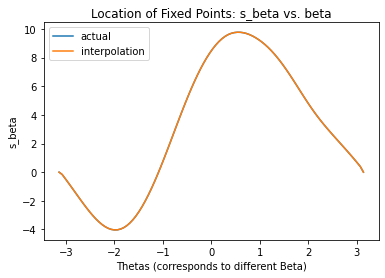

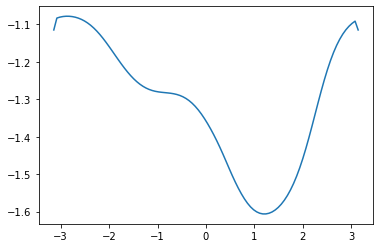

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.65it/s]


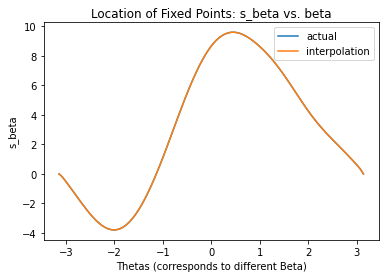

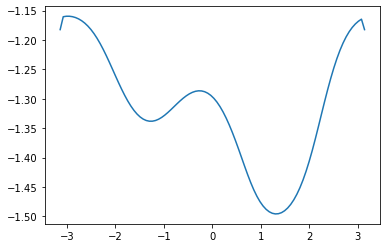

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]


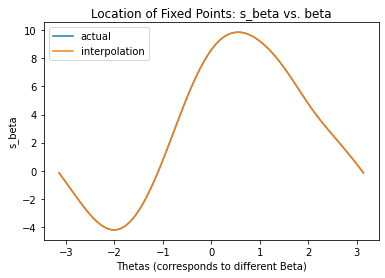

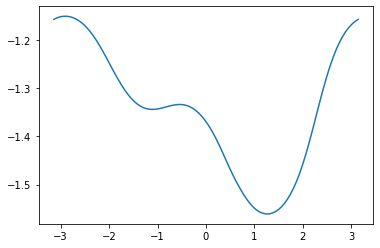

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]


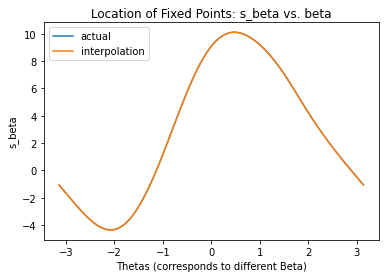

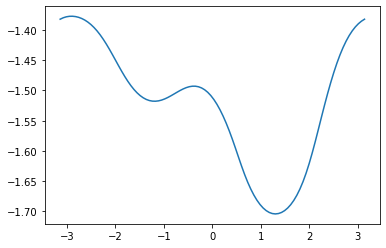

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.66it/s]


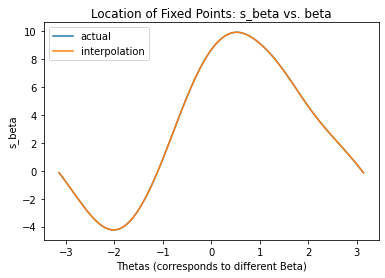

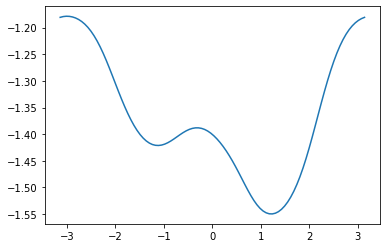

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.58it/s]


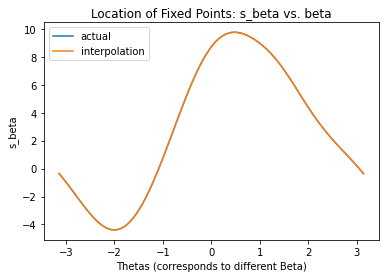

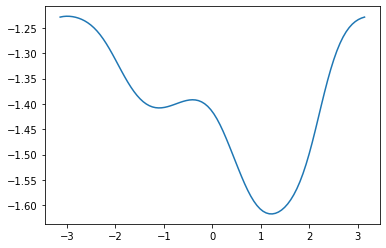

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.66it/s]


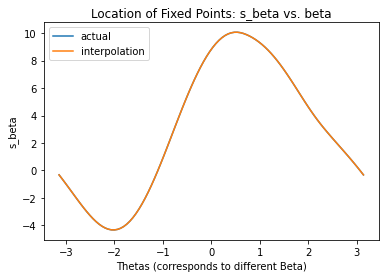

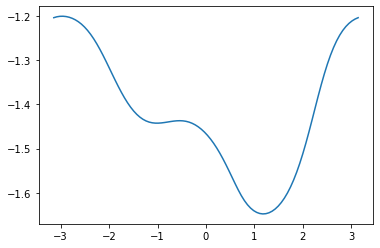

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.57it/s]


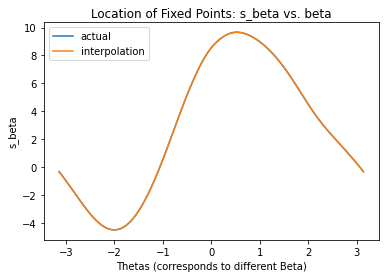

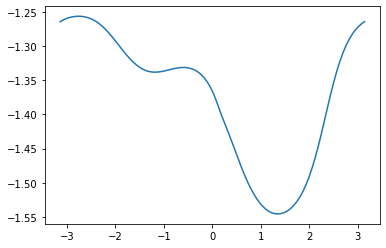

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


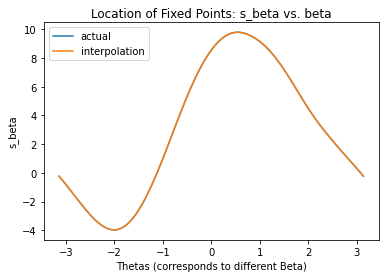

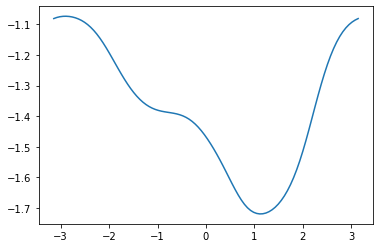

In [6]:
from utils import convert_to_unit_vector
for i in range(10):
    np.random.seed(i)
    agent_dist = create_challenging_agent_dist(n=100, n_types=10, d=2)
    sigma = compute_continuity_noise(agent_dist)
    q = 0.7
    f = fixed_point_interpolation_true_distribution(agent_dist, sigma, q, plot=True)
    
    thetas = np.linspace(-np.pi, np.pi, 100)
    losses = []
    for theta in thetas:
        exp_grad = ExpectedGradient(agent_dist, theta, f(theta), sigma, None)
        beta = convert_to_unit_vector(theta)
        res = np.matmul(beta.T, agent_dist.agents[0].best_response(beta, f(theta), sigma)).item()
        #losses.append(res)
        losses.append(exp_grad.expected_loss())
    plt.plot(thetas, losses)
    plt.show()
    plt.close()

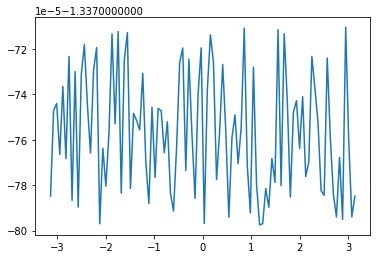

In [7]:
losses[0]

-1.3377848002362245

Failed to compute best response for agent with eta=[[5.9191923 ]
 [6.79364859]], gamma=[[1.]
 [1.]] under beta=[[-1.0000000e+00]
 [ 1.2246468e-16]], s=-10.0, sigma=0.3488295017096331.
Failed to compute best response for agent with eta=[[5.9191923 ]
 [6.79364859]], gamma=[[1.]
 [1.]] under beta=[[-1.0000000e+00]
 [ 1.2246468e-16]], s=-9.8989898989899, sigma=0.3488295017096331.
Failed to compute best response for agent with eta=[[5.9191923 ]
 [6.79364859]], gamma=[[1.]
 [1.]] under beta=[[-1.0000000e+00]
 [ 1.2246468e-16]], s=-9.797979797979798, sigma=0.3488295017096331.
Failed to compute best response for agent with eta=[[5.9191923 ]
 [6.79364859]], gamma=[[1.]
 [1.]] under beta=[[-1.0000000e+00]
 [ 1.2246468e-16]], s=-9.696969696969697, sigma=0.3488295017096331.
Failed to compute best response for agent with eta=[[5.9191923 ]
 [6.79364859]], gamma=[[1.]
 [1.]] under beta=[[-1.0000000e+00]
 [ 1.2246468e-16]], s=-9.595959595959595, sigma=0.3488295017096331.
Failed to compute best respons

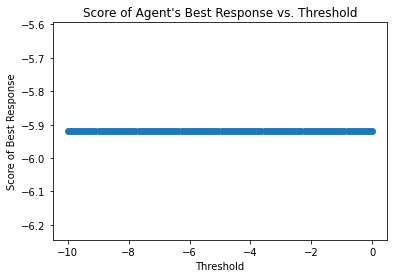

In [8]:
agent_dist.agents[0].plot_best_response_score(beta,  sigma)